# Solving 1-D Schrodinger Equation with quadratic potential
## Import required packages

In [ ]:
from scipy import integrate
from scipy import sparse
from scipy.fft import fft, ifft
import scipy

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from IPython.display import HTML
plt.rc('savefig', dpi=300)

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Set initial conditions

In [1]:
dx    = 0.02                       # spatial separation
x     = np.arange(0, 10, dx)       # spatial grid points

kx    = 0.1                        # wave number
m     = 0.5                          # mass
sigma = 0.3                        # width of initial gaussian wave-packet
#sigma = 1
x0    = 3.0                        # center of initial gaussian wave-packet
#x0 = 2.5

A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

# Initial Wavefunction
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)


# Potential V(x)
x_Vmin = 5         # center of V(x)
T      = 1           # peroid of SHO 

omega = 2 * np.pi / T
k = omega**2 * m

# Quadratic potential
V = 0.5 * k * (x - x_Vmin)**2

# Zero Potential
#V = x * 0


# Make a plot of psi0 and V 
plt.plot(x, V*0.01, "k--", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ (x0.01)")
plt.plot(x, np.abs(psi0)**2, "r", label=r"$\vert\psi(t=0,x)\vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)
print("Total Probability: ", np.sum(np.abs(psi0)**2)*dx)

NameError: name 'np' is not defined

In [ ]:
psi0[-1]

np.complex128(2.0947569311459104e-118+3.24808391095662e-118j)

In [ ]:
len(psi0)

500

## Fourier Transforms on Initial Condition $\psi_0$
`y[k]` of length $N$ of the length-$N$ sequence `x[n]` is defined as 
$$ y[k] = \sum_{n = 0}^{N-1} e^{-2\pi j \frac{kn}{N}}x[n]$$
and inverse transform is 
$$ x[n] = \frac{1}{N} \sum_{k = 0}^{N-1} e^{2 \pi j \frac{kn}{N}} y [k].$$

In [ ]:
y = fft(psi0)
#print(f" f(k) = {y}")
N = len(psi0)
np.allclose(ifft(y), psi0)

True

In [ ]:
def dftmtx(N):
    return fft(np.eye(N))

def uni_dftmtx(N):
    return fft(np.eye(N)) / np.sqrt(N)


W = dftmtx(N)
U = uni_dftmtx(N)

print(np.allclose(y, W@psi0))
print(np.allclose(U@U, np.eye(N), rtol = 1e-04))
print(np.allclose(psi0, U@U@psi0))
#U@U#np.matrix.conjugate(U)

True
False
False


In [ ]:
U =uni_dftmtx(3)
U 

array([[ 0.57735027-0.j ,  0.57735027+0.j ,  0.57735027-0.j ],
       [ 0.57735027-0.j , -0.28867513-0.5j, -0.28867513+0.5j],
       [ 0.57735027-0.j , -0.28867513+0.5j, -0.28867513-0.5j]])

## Laplace Operator (Finite Difference)

The 1-D Laplace operator $\nabla^2=\frac{\partial^2}{\partial x^2}$ can be expressed in terms of a banded matrix:

\begin{align}
\frac{\partial^2}{\partial x^2} y(x)
&= 
\frac{1}{dx} \left[ \frac{y_{n+1} - y_{n}}{dx} - \frac{y_{n} - y_{n-1}}{dx} \right]
\\
&=
\frac{y_{n+1} - 2 y_{n} + y_{n-1}}{(dx)^2} 
\\
&=
\frac{1}{(dx)^2}
\begin{pmatrix}
  -2  &  1  &  0  &  0 &  0 \\
   1  & -2  &  1  &  0 &  0 \\
   0  &  1  & -2  &  1 &  0 \\
   0  &  0  &  1  & -2 &  1 \\
   0  &  0  &  0  &  1 & -2 
\end{pmatrix}
\cdot
\begin{pmatrix}
   y_1   \\
   y_2   \\
   y_3   \\
   y_4   \\
   y_5  
\end{pmatrix}
\\
&\equiv
\mathbf{D2} \cdot \mathbf{y}
\end{align}

In [ ]:
# Laplace Operator (Finite Difference)
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

In [ ]:
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [ ]:
D2.toarray()

array([[-5000.,  2500.,     0., ...,     0.,     0.,     0.],
       [ 2500., -5000.,  2500., ...,     0.,     0.,     0.],
       [    0.,  2500., -5000., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ..., -5000.,  2500.,     0.],
       [    0.,     0.,     0., ...,  2500., -5000.,  2500.],
       [    0.,     0.,     0., ...,     0.,  2500., -5000.]])

To test our $\mathbf{D2}$ operator, we can apply it on a $\sin(x)$ function to see if it gives us $\sin''(x)=-\sin(x)$

In [ ]:
a = [1, 2, 3]
b = fft(a)
W = scipy.linalg.dft(3)
W.conj().T@W

array([[ 3.00000000e+00+0.00000000e+00j, -2.22044605e-16-2.22044605e-16j,
         4.44089210e-16-8.88178420e-16j],
       [-2.22044605e-16+2.22044605e-16j,  3.00000000e+00-5.15256299e-17j,
        -3.33066907e-16-3.98552134e-18j],
       [ 4.44089210e-16+8.88178420e-16j, -3.33066907e-16+1.17925428e-16j,
         3.00000000e+00-6.90312546e-18j]])

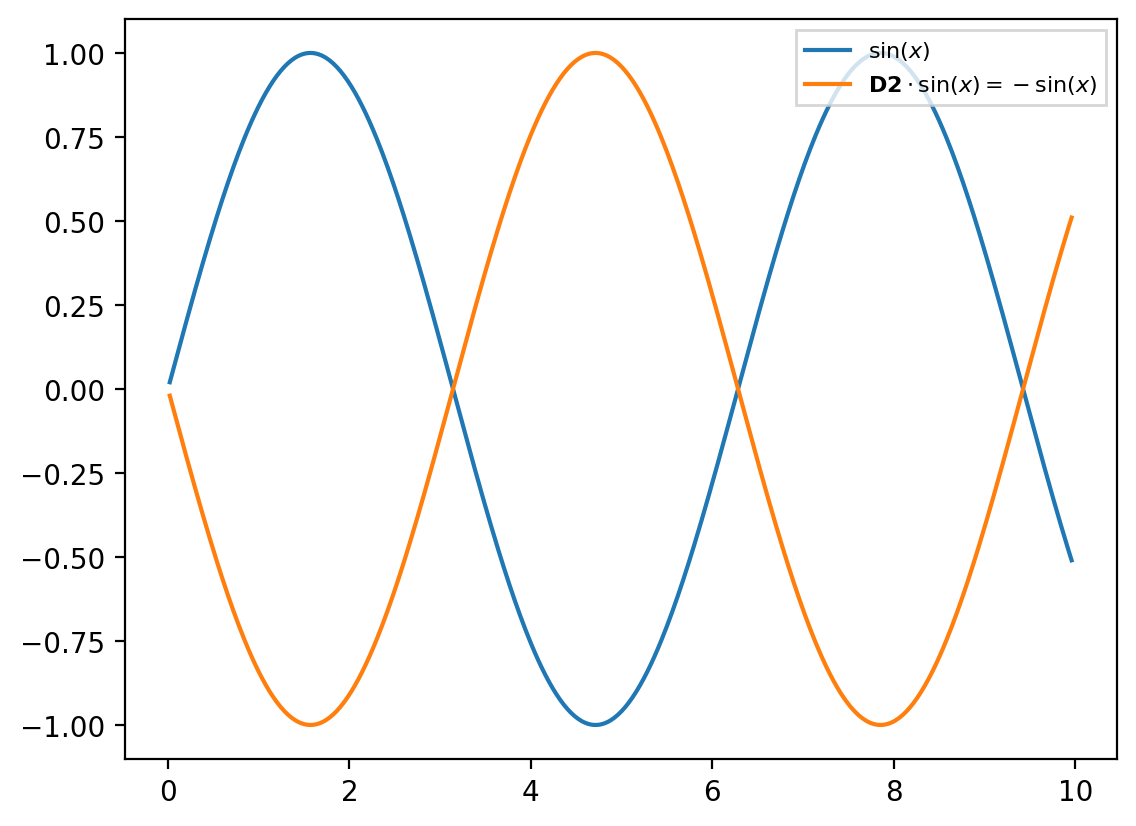

In [ ]:
plt.plot(x[1:-1], np.sin(x)[1:-1], label=r"$\sin(x)$")
plt.plot(x[1:-1], D2.dot(np.sin(x))[1:-1], label=r"$\mathbf{D2} \cdot \sin(x) = -\sin(x)$")
plt.legend(loc=1, fontsize=8, fancybox=False)

## Solve Schrodinger Equation

Original 1-D Schrodinger equation: $-\frac{\hbar^2}{2m}\nabla^2\psi + V \psi = i\hbar\frac{\partial}{\partial t}\psi$


=> $\psi_t \equiv \frac{\partial}{\partial t}\psi(t,x) = -i\left[-\frac{\hbar}{2m}\nabla^2\psi(t,x) + \frac{1}{\hbar} V(x) \psi(t,x)\right]$

In [ ]:
# RHS of Schrodinger Equation
hbar = 1
# hbar = 1.0545718176461565e-34
def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)

In [ ]:
dt = 0.005  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1.0    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")

500 spatial locations, 200 time steps

In [ ]:
sol.y

array([[ 2.64501299e-022+0.00000000e+000j,
         4.06182541e-016-2.35179996e-015j,
         1.60512612e-012+3.46565092e-013j, ...,
        -3.14967841e-006+3.12950452e-006j,
        -2.74788890e-007+1.31501137e-006j,
         2.85543385e-006-2.85404422e-006j],
       [ 5.14033587e-022+1.02806854e-024j,
        -5.05175166e-016+3.12684379e-015j,
        -2.39882595e-012-5.01213138e-013j, ...,
        -1.73458670e-007+1.87526586e-006j,
         6.69498204e-006+6.00822408e-006j,
         4.58533993e-006+2.08191032e-006j],
       [ 9.94542276e-022+3.97819032e-024j,
         3.33982943e-016-2.33399679e-015j,
         2.20110956e-012+4.34504158e-013j, ...,
        -9.28686441e-006+9.28028555e-006j,
        -7.04154609e-007+3.95274477e-006j,
         8.49419065e-006-8.42383784e-006j],
       ...,
       [ 4.64764646e-117+7.14364012e-117j,
        -2.23631860e-109+2.41999908e-109j,
         7.00520537e-107+5.43032930e-107j, ...,
         2.83592129e-006+2.40235337e-006j,
         2.77039926

In [ ]:
sol1 = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = np.array([0.5]), method="RK23")
sol1

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 5.000e-01]
        y: [[-1.98083470e-06+4.32756796e-07j]
            [ 4.04596087e-06-5.98870045e-07j]
            ...
            [-1.38381684e-06+2.79911338e-06j]
            [-7.02411960e-07+1.40863129e-06j]]
      sol: None
 t_events: None
 y_events: None
     nfev: 17405
     njev: 0
      nlu: 0

## Plotting

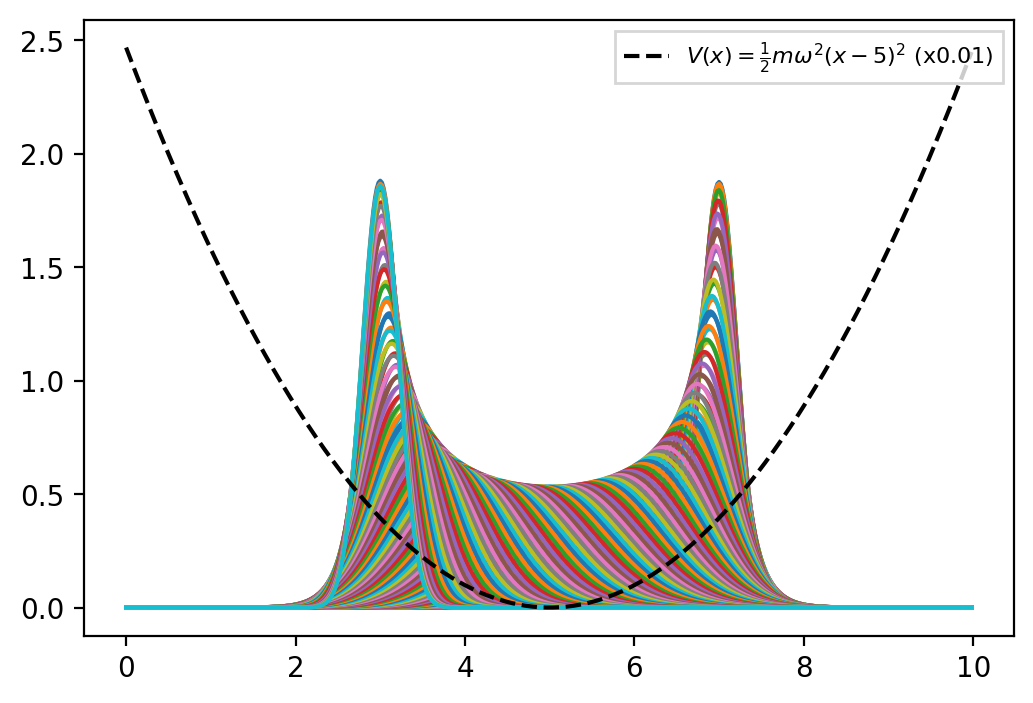

In [ ]:
fig = plt.figure(figsize=(6, 4))
#plt.plot(x, np.abs(sol.y[:, 0])**2, label="Initial Condition")
#plt.plot(x, np.abs(sol.y[:, 0])**2, label="Initial Condition")
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:,i])**2)             # Plot Wavefunctions
    #print(np.sum(np.abs(sol.y[:,i])**2)*dx)        # Print Total Probability (Should = 1)
plt.plot(x, V * 0.01, "k--", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ (x0.01)")   # Plot Potential
plt.legend(loc=1, fontsize=8, fancybox=False)
fig.savefig('sho@2x.png')

Text(0.5, 0.5, 't')

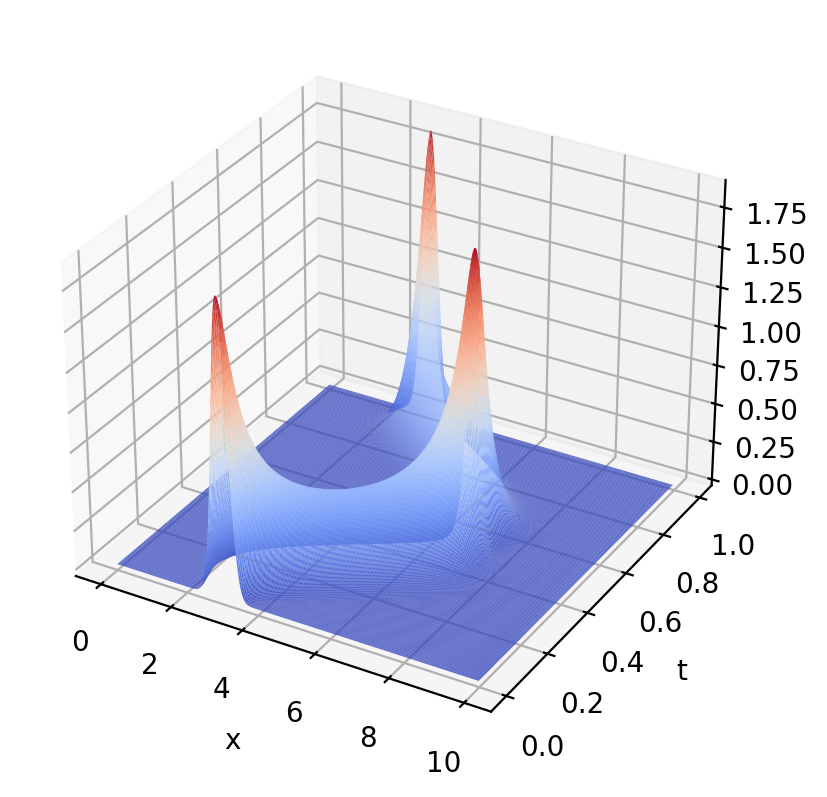

In [ ]:
t_grid, x_grid  = np.meshgrid(t_eval, x)

ax = plt.axes(projection="3d")
ax.plot_surface(x_grid, t_grid, np.abs(sol.y)**2, rstride=1, cstride=1, cmap=cm.coolwarm, edgecolor="none")
ax.set_xlabel('x')
ax.set_ylabel('t')


In [ ]:
np.shape(sol.t)

(200,)

In [ ]:
dx

0.02

In [ ]:
# Print Total Probability (Should = 1)
for i, t in enumerate(sol.t):
    print(np.sum(np.abs(sol.y[:,i])**2) * dx)

1.0
0.9999887505075309
0.9999769520753166
0.999975532404481
0.9999749859996002
0.9999748098919764
0.9999747253261105
0.9999746939269774
0.9999746792904555
0.999974673548979
0.9999746710506291
0.9999746712441389
0.9999746742851913
0.9999746767297915
0.9999746756680965
0.9999746768371935
0.9999746841235886
0.9999746903575911
0.9999746893728988
0.9999746941072937
0.9999747127414067
0.999974724004112
0.9999747287278534
0.999974773720419
0.9999748136120999
0.9999748231194765
0.9999749091710777
0.9999750061687191
0.9999750088093318
0.999975080950145
0.9999752793943594
0.9999753844434734
0.9999753682989533
0.9999755073626212
0.9999758522591462
0.9999760507189407
0.9999760042761631
0.9999761516237818
0.9999766871825477
0.9999771757427918
0.9999771478075324
0.9999771504711835
0.9999777515621188
0.9999787297621353
0.9999791137893418
0.9999788816825373
0.9999790660899135
0.9999801761077852
0.9999815654784978
0.9999819042059069
0.9999814358608059
0.9999815007853602
0.9999827682185942
0.99998462957

## Animation

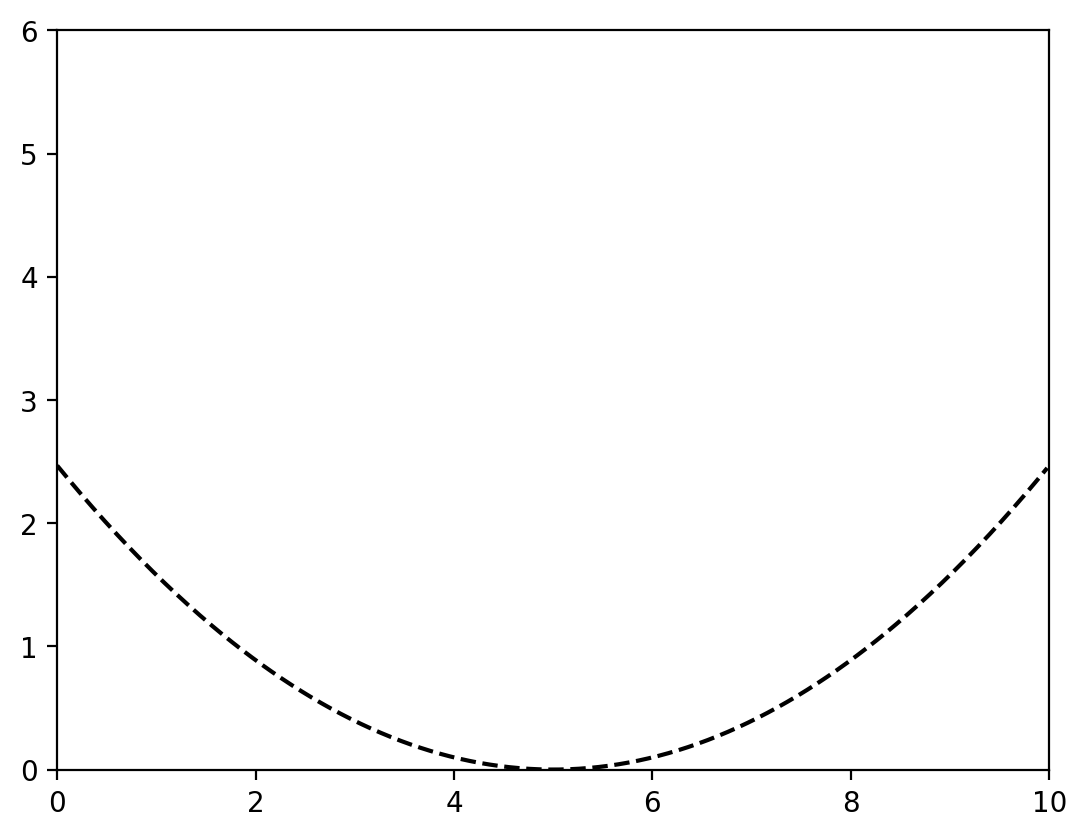

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V * 0.01)
    return line1,


def animate(i):
    line2.set_data(x, np.abs(sol.y[:,i])**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)

In [ ]:
# Save the animation into a short video
anim.save('sho.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)

MovieWriter ffmpeg unavailable; using Pillow instead.


TypeError: AbstractMovieWriter.__init__() got an unexpected keyword argument 'extra_args'

In [ ]:
# Display the animation in the jupyter notebook
HTML(anim.to_jshtml())